# K-Nearest Neighbours (No Cross Validation or Generalization)

Basically trying to implement common distance calculation algorithms and would like to try KNN using those on Iris Data Set.

From this trying to observe overfitting/underfitting behaviour when we do not have cross validation

Referece
    1. [http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/]
    2. [https://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/cosdist.htm]

- Implemented required distance functions (yet to review its accuracy)
- Loaded Irsi dataset
- splitted into training and test dataset 80%, 20%
- for each distance algorith, running k-NN from 1 to 9 and printing its accuracy

In [1]:
# Importing required modules
from math import * # for math operation
from decimal import Decimal # for decimal approximation
import operator # for selection
import pandas as pd # for handling iris dataset
from sklearn.model_selection import train_test_split # for splitting dataset into train/test
from sklearn.preprocessing import StandardScaler # for Column Standardization

In [2]:
# My test vector

v1 = [1.0, 3.2, 4.8, 0.1, 3.2, 0.6, 2.2, 1.1]
v2 = [0.1, 5.2, 1.9, 4.2, 1.9, 0.1, 0.1, 6.0]

## Distance Algorthm Implementations

### Manhattan Distance

Also referred as L<sub>1</sup> Norm

\begin{equation*}
L_1 Norm = \lvert \vert x - y \rvert \rvert_1 = \left( \sum_{i=1}^n \lvert (x_i - y_i) \rvert \right)
\end{equation*}

In [3]:
def manhanttan_dist(v1, v2):
    '''
    returns manhattan distance between vector v1 and v2 having same dimension d
    numeric components for vectors v1 and v2 are assumed
    '''
    return round(Decimal(sum(abs(a-b) for a, b in zip(v1, v2))),3)

print(manhanttan_dist(v1,v1), manhanttan_dist(v2,v2))
print(manhanttan_dist(v1, v2), manhanttan_dist(v2, v1))

0.000 0.000
18.700 18.700


### Eucliean Distance

Also referred as L<sub>2</sub> Norm

\begin{equation*}
L_2 Norm = \lvert \vert x - y \rvert \rvert_2 = \sqrt{\left( \sum_{i=1}^d (x_{1i} - y_{2i})^2 \right)} = \sqrt{(x-y)^T(x-y)}
\end{equation*}

\begin{equation*}
L_2 Norm = \lvert \vert x - y \rvert \rvert_2 = \left( \sum_{i=1}^d (x_{1i} - y_{2i})^2 \right)^\frac{1}{2}
\end{equation*}

In [4]:
def eucd_dist(v1,v2):
    '''
    returns euclidean distance between vector v1 and v2 having same dimension d
    numeric components for vectors v1 and v2 are assumed
    '''
    return round(Decimal(sqrt(sum(pow(a-b,2) for a,b in zip(v1,v2)))),3)

In [5]:
print(eucd_dist(v1,v1), eucd_dist(v2,v2))
print(eucd_dist(v1, v2), eucd_dist(v2, v1))

0.000 0.000
7.771 7.771


### Minkowski Distance

Also referred as L<sub>p</sub> Norm, where __p > 0__

[Can be used for both 'Ordinal' and 'Quantitative' Values](https://people.revoledu.com/kardi/tutorial/Similarity/MinkowskiDistance.html)

\begin{equation*}
L_p Norm = \lvert \vert x - y \rvert \rvert_p = \left( \sum_{i=1}^d \lvert x_{1i} - y_{2i} \rvert ^p \right)^\frac{1}{p}
\end{equation*}

Observations of Minkowski:

\begin{equation*}
L_1 Norm = Manhattan Distance
\end{equation*}
\begin{equation*}
L_2 Norm = Euclidean Distance
\end{equation*}

\begin{equation*}
L_\infty Norm = Chebyshev Distance = L_{max} Norm
\end{equation*}


In [6]:
def getNthRoot(val, n_root):
    '''
    returns n_th root of the given value
    '''
    return round(Decimal(val) ** Decimal(Decimal(1.0)/n_root),3)

def minkowski_dist(v1, v2, p):
    '''
    returns minkowski distance between vectors v1 and v2 of same dimension d
        numeric components for vectors v1 and v2 are assumed
        v1, v2 ==> vectors
        p ==> p-form that need to be calcualted
    '''
    return getNthRoot(sum(pow(abs(a-b),p) for a,b in zip(v1, v2)), p)

#print(getNthRoot(2,9))
#print(minkowski_dist([0,3,4,5], [7,6,3,-1], 3))


for p in range(1,5):
    print("p :", p, minkowski_dist(v1, v2, p), minkowski_dist(v2, v1, p))

p : 1 18.700 18.700
p : 2 7.771 7.771
p : 3 6.138 6.138
p : 4 5.579 5.579


### Consine Similarity


\begin{equation*}
\cos \theta = \frac{a.b}{\lvert \lvert a \rvert \rvert \; \lvert  \lvert b \rvert \rvert}
\end{equation*}

\begin{equation*}
\cos \theta = \frac{a^Tb}{\lvert \lvert a \rvert \rvert \; \lvert \lvert b \rvert \rvert}
\end{equation*}

\begin{equation*}
\cos \theta = \Bigl(\frac{a}{\lvert \lvert a \rvert \rvert}\Bigr) ^T \; \Bigl(\frac{b}{\lvert \lvert b \rvert \rvert}\Bigr)
\end{equation*}

if both a and b are unit vectors, then cosine similarity is the dot product of both vectors a and b

\begin{equation*}
\cos \theta = a . b
\end{equation*}



__Dot Product (Alebraic Equation)__

Let, x = [x1, x2, ..., xd] a vector, y = [y1, y2, ...., yd] a vector

the Dot product of x.y is (Algebraic)

\begin{equation*}
x.y = x^T y
\end{equation*}

\begin{equation*}
x.y = x_1 y_1 + x_2 y_2 + ... + x_d y_d
\end{equation*}

\begin{equation*}
x.y = \sum_{i=1}^d x_i y_i
\end{equation*}

Algebraic Dot Product of two vectors tells how similar those two vectors are. Usefull in Text Processing to find how two vectors are similar

__Dot Product (Geometric Equation)__

\begin{equation*}
x.y = \lvert \lvert x \rvert \rvert \; \lvert \lvert y \rvert \rvert \; \cos \theta
\end{equation*}


*cosine and euclidean distance are same if the vectors are in unit length*

[https://www.machinelearningplus.com/nlp/cosine-similarity/
- It is a metrix used t measure how similar the documents are irrespective of their size
- Mahtematically it measures the cosine of the angle between two vectors projected in a multi-dimensional space

__When to use Cosine__

https://cmry.github.io/notes/euclidean-v-cosine

- Cosine Similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. This happens for example when working with text data represented by word counts.

In [7]:
def dot_product(v1, v2):
    '''
    returns algebraic dot product of two vectors v1 and v2
    '''
    return Decimal(sum(a*b for a,b in zip(v1,v2)))

def getLength(v1):
    '''
    returns length/magniture of the given vector
    '''
    return Decimal(sqrt(sum(x*x for x in v1)))

def scalarMultiply(v1, c):
    '''
    performs scalar multiplication over given vector v1
    '''
    return [round(Decimal(x*c),3) for x in v1]

def normalize(v1):
    '''
    returns the unit vector of given vector v1
    '''
    l = getLength(v1)
    if(l == 0):
        return 0; # TO DO - Raise Exception
    
    return scalarMultiply(v1,(Decimal(1.0)/l))

def cosine_similarity(v1,v2):
    '''
    returns consine similarity between vectors v1 and v2
    '''
    numerator = dot_product(v1, v2)
    denominator = getLength(v1) * getLength(v2)
    return round(Decimal(numerator / denominator), 3)

In [8]:
# Validation

a = [5,3]
b = [1,4]

print('Euclidean_Distance(a,b): ', eucd_dist(a,b))
print('Unit Vecor of a: ', normalize(a))
print('Unit Vecor of b: ', normalize(b))
print('cos_similarity(a,b): ', cosine_similarity(a,b))

Euclidean_Distance(a,b):  4.123
Unit Vecor of a:  [Decimal('0.857'), Decimal('0.514')]
Unit Vecor of b:  [Decimal('0.243'), Decimal('0.970')]
cos_similarity(a,b):  0.707


In [9]:
# https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html
import numpy as np

def cos_sim(a, b):
    """Takes 2 vectors a, b and returns the cosine similarity according 
    to the definition of the dot product
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# the counts we computed above
sentence_m = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0]) 
sentence_h = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0])
sentence_w = np.array([0, 0, 0, 1, 0, 0, 1, 1, 1])

# We should expect sentence_m and sentence_h to be more similar
print(cos_sim(sentence_m, sentence_h)) # 0.5
print(cos_sim(sentence_m, sentence_w)) # 0.25

0.5
0.25


### Cosine Dissimlarity

\begin{equation*}
1 - cosine\_similarity(x,y)
\end{equation*}

In [10]:
def consine_dissimilarity(v1, v2):
    '''
    returns cosine dissimilarity between vectors v1 and v2
    '''
    return (1-cosine_similarity(v1,v2))

In [11]:
print('cos_similarity(a,b): ', consine_dissimilarity(a,b))

cos_similarity(a,b):  0.293


## k-NN Implementation (for Iris DataSet)

## Calculating Accuracy

# Iris Data Set

## Load DataSet

In [12]:
df = pd.read_csv('./iris.data')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split DataSet

In [13]:
# Split the data and labels for easy handling
# 80% training
# 20% for testing
df_train, df_test = train_test_split(df, test_size=0.3)

#df_data = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
#df_labels = df[['species']]
#print(df_data.head())
#print(df_labels.head())

In [14]:
print('Training Dataset:')
print(df_train.shape)
print(df_train.head())
print(df_train.describe())

Training Dataset:
(105, 5)
     sepal_length  sepal_width  petal_length  petal_width     species
85            6.0          3.4           4.5          1.6  versicolor
38            4.4          3.0           1.3          0.2      setosa
103           6.3          2.9           5.6          1.8   virginica
44            5.1          3.8           1.9          0.4      setosa
140           6.7          3.1           5.6          2.4   virginica
       sepal_length  sepal_width  petal_length  petal_width
count    105.000000   105.000000    105.000000   105.000000
mean       5.853333     3.014286      3.812381     1.206667
std        0.828932     0.415662      1.737798     0.749136
min        4.400000     2.000000      1.300000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.200000      5.100000     1.800000
max        7.900000     4.200000      6.900000     2.500000


In [15]:
print('Test Dataset:')
print(df_test.shape)
print(df_test.head())
print(df_test.describe())

Test Dataset:
(45, 5)
     sepal_length  sepal_width  petal_length  petal_width     species
76            6.8          2.8           4.8          1.4  versicolor
53            5.5          2.3           4.0          1.3  versicolor
113           5.7          2.5           5.0          2.0   virginica
87            6.3          2.3           4.4          1.3  versicolor
117           7.7          3.8           6.7          2.2   virginica
       sepal_length  sepal_width  petal_length  petal_width
count      45.00000    45.000000     45.000000    45.000000
mean        5.82000     3.146667      3.633333     1.180000
std         0.83492     0.464465      1.838848     0.803289
min         4.30000     2.200000      1.000000     0.100000
25%         5.10000     2.900000      1.500000     0.300000
50%         5.80000     3.100000      4.200000     1.300000
75%         6.40000     3.400000      5.100000     1.900000
max         7.70000     4.400000      6.700000     2.500000


## Calculating Neighbors

In [16]:
def getNeighbours(training_data_set, query_point, k, algo='euct', p=3):
    '''
    returns list having k neighbors to the given query data point
    input:
        training_data_set: Pandas DataFrame
        query_point: Pandas DataSeries
        k: Number of Neighbors to calculate
        algo: type of distance algorithm to use
            euct (euclidean distance default)
            maht (manhattan)
            mink (minkowski)
            coss (cosine similarity)
            cods (cosine dissimilarity/ cosine distance)
        p: minkowski required p norm (default 3)
    Output:
        List of nearest data points
    '''
    distances = [] # list to hold all the neighbors
    
    # calcualte distance between query_point and every point in data set
    # create a list
    for x in range(len(training_data_set)):
        # stip non-numeric label - in training data
        v1 = training_data_set.iloc[x]
        v1 = v1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        #print(type(v1), v1)
        
        # stip non-numeric label - in query data
        q_v = query_point[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        if algo == 'maht':
            dist = manhanttan_dist(q_v, v1)
        elif algo == 'mink':
            dist = minkowski_dist(q_v, v1, p)
        elif algo == 'coss':
            dist = cosine_similarity(q_v, v1)
        elif algo == 'cods':
            dist = consine_dissimilarity(q_v, v1)
        else:
            dist = eucd_dist(q_v, v1)
        distances.append((dist, training_data_set.iloc[x]))
        
    # sort the list in ascending order
    distances.sort(key=lambda tup:tup[0])
    #print(distances)
    
    # select k nearest neighbors and return it
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

## Calculating Responses

In [17]:
def getClassLabel(neighbors):
    '''
    returns the class label having majority vote
    Note that it doesn't handle 'Not Sure' case yet
    '''
    class_votes = {} # dictionary keys are flowers, values are its counts
    for x in range(len(neighbors)):
        class_label = neighbors[x][-1]
        if class_label in class_votes:
            class_votes[class_label] += 1
        else:
            class_votes[class_label] = 1
    
    response = max(class_votes.items(), key=operator.itemgetter(1))[0]
    return response

## Accuracy of Predictions

- Try to check accuray for k in range 1 to 9
    - Euclidean Distance
    - Cosine Similarity
    - Manhattan Distance
    - L_3 Norm (minkowski distance)

In [18]:
# Max number of k that need to be tried
max_k = 11

### Euclidean Distance

In [19]:
%%time

ecut_dist_results = ['Euclidean-Distance']
for k in range(1,max_k):
    correct_predictions = 0
    for t_index in range(len(df_test)):
        test_data_point = df_test.iloc[t_index]
        neighbors = getNeighbours(df_train, test_data_point, k)
        predicted_class = getClassLabel(neighbors)
        if predicted_class == test_data_point['species']:
            correct_predictions += 1
        #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

    accuracy = round((correct_predictions/len(df_test)) * 100,3)
    print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df_test))
    ecut_dist_results.append(accuracy)
    
print(ecut_dist_results)

k= 1  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 2  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 3  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 4  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 5  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 6  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 7  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 8  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 9  Accuracy:  95.556 , Total correct predictions:  43  out of  45
k= 10  Accuracy:  97.778 , Total correct predictions:  44  out of  45
['Euclidean-Distance', 100.0, 100.0, 97.778, 97.778, 97.778, 97.778, 97.778, 97.778, 95.556, 97.778]
Wall time: 1min 15s


### Cosine Similarity

In [20]:
%%time

# TO-DO
# Standardize the Data
#standardized_data = StandardScaler().fit_transform(final_counts.toarray().astype(np.float64)) #, with_mean=False
#print('Shape of Standardized data', standardized_data.shape)

coss_sim_results = ['Cosine-Similarity']
for k in range(1,max_k):
    correct_predictions = 0
    for t_index in range(len(df_test)):
        test_data_point = df_test.iloc[t_index]
        neighbors = getNeighbours(df_train, test_data_point, k, 'coss')
        predicted_class = getClassLabel(neighbors)
        if predicted_class == test_data_point['species']:
            correct_predictions += 1
        #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

    accuracy = round((correct_predictions/len(df_test)) * 100,3)
    print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df_test))
    coss_sim_results.append(accuracy)
    
print(coss_sim_results)

k= 1  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 2  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 3  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 4  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 5  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 6  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 7  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 8  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 9  Accuracy:  0.0 , Total correct predictions:  0  out of  45
k= 10  Accuracy:  0.0 , Total correct predictions:  0  out of  45
['Cosine-Similarity', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Wall time: 1min 17s


### Cosine Distance

In [21]:
%%time

# TO-DO
# Standardize the Data
#standardized_data = StandardScaler().fit_transform(final_counts.toarray().astype(np.float64)) #, with_mean=False
#print('Shape of Standardized data', standardized_data.shape)

coss_dissim_results = ['Cosine-Dissimilarity']
for k in range(1,max_k):
    correct_predictions = 0
    for t_index in range(len(df_test)):
        test_data_point = df_test.iloc[t_index]
        neighbors = getNeighbours(df_train, test_data_point, k, 'cods')
        predicted_class = getClassLabel(neighbors)
        if predicted_class == test_data_point['species']:
            correct_predictions += 1
        #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

    accuracy = round((correct_predictions/len(df_test)) * 100,3)
    print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df_test))
    coss_dissim_results.append(accuracy)
    
print(coss_dissim_results)

k= 1  Accuracy:  95.556 , Total correct predictions:  43  out of  45
k= 2  Accuracy:  95.556 , Total correct predictions:  43  out of  45
k= 3  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 4  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 5  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 6  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 7  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 8  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 9  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 10  Accuracy:  100.0 , Total correct predictions:  45  out of  45
['Cosine-Dissimilarity', 95.556, 95.556, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Wall time: 1min 17s


### Manhattan Distance

In [22]:
%%time

manhattan_results = ['Manhattan']
for k in range(1,max_k):
    correct_predictions = 0
    for t_index in range(len(df_test)):
        test_data_point = df_test.iloc[t_index]
        neighbors = getNeighbours(df_train, test_data_point, k, 'maht')
        predicted_class = getClassLabel(neighbors)
        if predicted_class == test_data_point['species']:
            correct_predictions += 1
        #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

    accuracy = round((correct_predictions/len(df_test)) * 100,3)
    print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df_test))
    manhattan_results.append(accuracy)
    
print(manhattan_results)

k= 1  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 2  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 3  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 4  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 5  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 6  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 7  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 8  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 9  Accuracy:  95.556 , Total correct predictions:  43  out of  45
k= 10  Accuracy:  97.778 , Total correct predictions:  44  out of  45
['Manhattan', 100.0, 100.0, 97.778, 97.778, 97.778, 97.778, 97.778, 97.778, 95.556, 97.778]
Wall time: 1min 15s


### Minkowski Distance with p=3

In [23]:
%%time

minkowsi_results_3 = ['Minkowski p=3']
for k in range(1,max_k):
    correct_predictions = 0
    for t_index in range(len(df_test)):
        test_data_point = df_test.iloc[t_index]
        neighbors = getNeighbours(df_train, test_data_point, k, 'mink')
        predicted_class = getClassLabel(neighbors)
        if predicted_class == test_data_point['species']:
            correct_predictions += 1
        #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

    accuracy = round((correct_predictions/len(df_test)) * 100,3)
    print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df_test))
    minkowsi_results_3.append(accuracy)
    
print(minkowsi_results_3)

k= 1  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 2  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 3  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 4  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 5  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 6  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 7  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 8  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 9  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 10  Accuracy:  97.778 , Total correct predictions:  44  out of  45
['Minkowski p=3', 100.0, 100.0, 97.778, 97.778, 97.778, 100.0, 97.778, 97.778, 97.778, 97.778]
Wall time: 1min 25s


### Minkowski Distance with p=4

In [24]:
%%time

minkowsi_results_4 = ['Minkowski p=4']
for k in range(1,max_k):
    correct_predictions = 0
    for t_index in range(len(df_test)):
        test_data_point = df_test.iloc[t_index]
        neighbors = getNeighbours(df_train, test_data_point, k, 'mink')
        predicted_class = getClassLabel(neighbors)
        if predicted_class == test_data_point['species']:
            correct_predictions += 1
        #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

    accuracy = round((correct_predictions/len(df_test)) * 100,3)
    print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df_test))
    minkowsi_results_4.append(accuracy)
    
print(minkowsi_results_4)

k= 1  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 2  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 3  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 4  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 5  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 6  Accuracy:  100.0 , Total correct predictions:  45  out of  45
k= 7  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 8  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 9  Accuracy:  97.778 , Total correct predictions:  44  out of  45
k= 10  Accuracy:  97.778 , Total correct predictions:  44  out of  45
['Minkowski p=4', 100.0, 100.0, 97.778, 97.778, 97.778, 100.0, 97.778, 97.778, 97.778, 97.778]
Wall time: 1min 25s


## Accuracy Result

In [25]:
col_names = ['Method']
[col_names.append(k) for k in range(1,max_k)]
disp_df = pd.DataFrame([ecut_dist_results, coss_sim_results, coss_dissim_results, manhattan_results, minkowsi_results_3,minkowsi_results_4], columns=col_names)
disp_df.head(len(disp_df))

,Method,1,2,3,4,5,6,7,8,9,10
0,Euclidean-Distance,100.000,100.000,97.778,97.778,97.778,97.778,97.778,97.778,95.556,97.778
1,Cosine-Similarity,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Cosine-Dissimilarity,95.556,95.556,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
3,Manhattan,100.000,100.000,97.778,97.778,97.778,97.778,97.778,97.778,95.556,97.778
4,Minkowski p=3,100.000,100.000,97.778,97.778,97.778,100.000,97.778,97.778,97.778,97.778
5,Minkowski p=4,100.000,100.000,97.778,97.778,97.778,100.000,97.778,97.778,97.778,97.778


# Observation

- Training Data highly influences the prediction accuracy
    - if we rerun this test multiple times, you can see differences in accuracy for each test
    - High Sample Variability seen (Variance)
- Low Bias observered (most prediction matches with actual class)
- Cosine Similairy
    - almost no correct prediction is expected for this dataset
    - Since we are using ordinal values, the magnitude (that is we are using length, which is an ordinal measure) also need to be considered
    - but cosine similarity dont consider magnitude, it consideres only angle between vectors
    - so we are having almost incorrect predictions
- Cosine Dissimilarity
    - Yet to understand this observation
- on multiple trials, it can be observed that prediction performenece is very good
    - but still K is chosen based on above table means, it is a overfitting.
    - That is trying to find proper K in K-NN based on test data point. Making test data point indirectly as training data, because it is the deciding factor for K value.
        - THis will not perform well with actual unseen data

# Some plotting of data for more understanding on observation

In [26]:
# Checking how images are classifiable 
ax = df[df['species'] == 'setosa'].plot.scatter(x='sepal_length', y='sepal_width', c = 'blue', label='setosa')
ax = df[df['species'] == 'versicolor'].plot.scatter(x='sepal_length', y='sepal_width', c = 'orange', label='versicolor', ax=ax)
ax = df[df['species'] == 'virginica'].plot.scatter(x='sepal_length', y='sepal_width', c = 'green', label='virginica', ax=ax)
ax

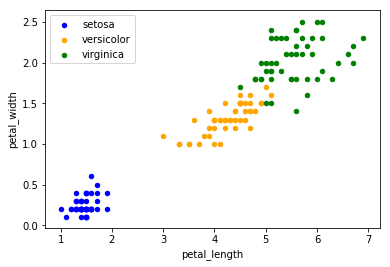

In [27]:
# Checking how images are classifiable 
ax = df[df['species'] == 'setosa'].plot.scatter(x='petal_length', y='petal_width', c = 'blue', label='setosa')
ax = df[df['species'] == 'versicolor'].plot.scatter(x='petal_length', y='petal_width', c = 'orange', label='versicolor', ax=ax)
ax = df[df['species'] == 'virginica'].plot.scatter(x='petal_length', y='petal_width', c = 'green', label='virginica', ax=ax)
ax